# Visualização dos resultados de treinamento

In [1]:
import matplotlib.pyplot as plt
import torch
from torch import nn
from torchvision import models
import dataset

# Os pesos do modelo foram salvos quando ele estava na GPU. Por padrão, o Pytorch
# carrega o modelo no mesmo device no qual ele foi salvo. Para evitar erro caso
# uma GPU não esteja disponível, usamos o parâmeto `map_location`
checkpoint = torch.load('../data/checkpoints/M06/checkpoint.pt', map_location='cpu')
checkpoint.keys()

dict_keys(['params', 'model', 'optim', 'sched', 'logger'])

### Criação dos objetos

In [2]:
ds_train, ds_valid, class_weights = dataset.get_dataset('../data/oxford_pets')
model = models.resnet18()
model.fc = nn.Linear(model.fc.in_features, 2)
model.load_state_dict(checkpoint['model'])
model.eval();

### Visualização dos resultados

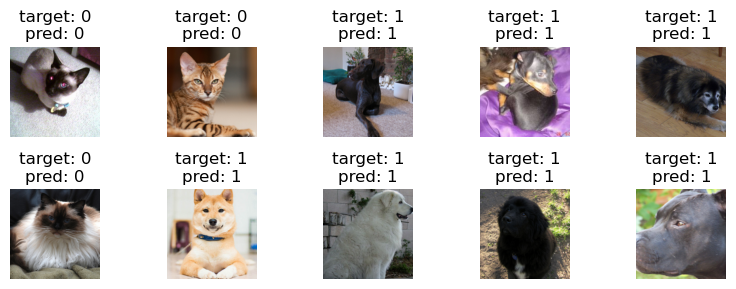

In [35]:
def show_results(model, ds):

    # Sorteia 10 índices do dataset
    indices = torch.randperm(len(ds))[:10]

    fig, axs = plt.subplots(2, 5, figsize=(8,3))
    axs = axs.reshape(-1)
    for ax_idx, idx in enumerate(indices):
        img, target = ds[idx]
        with torch.no_grad():
            scores = model(img.unsqueeze(0))
        pred = torch.argmax(scores)
        axs[ax_idx].imshow(dataset.unormalize(img))
        axs[ax_idx].set_title(f'target: {target}\npred: {pred}')
        axs[ax_idx].set_axis_off()
    plt.tight_layout()

show_results(model, ds_valid)